In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Since there are so many files, we will only print a sample of them: 

print("Sample files: ")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames[0:5]:
        print(os.path.join(dirname, filename))

Sample files: 
/kaggle/input/prostate-cancer-grade-assessment/sample_submission.csv
/kaggle/input/prostate-cancer-grade-assessment/train.csv
/kaggle/input/prostate-cancer-grade-assessment/test.csv
/kaggle/input/prostate-cancer-grade-assessment/train_images/825c6002ff3ab0e041ebd7025ba41b4f.tiff
/kaggle/input/prostate-cancer-grade-assessment/train_images/45d0ddf0aeb9b7f3c8e6c19c4405ac99.tiff
/kaggle/input/prostate-cancer-grade-assessment/train_images/ae8f2e2b28764a604d1acc4bd7c8feb7.tiff
/kaggle/input/prostate-cancer-grade-assessment/train_images/11a715facad7b619e3213ce126be1c77.tiff
/kaggle/input/prostate-cancer-grade-assessment/train_images/4ecad8aefbc2ce6931baaee0cda6955b.tiff
/kaggle/input/prostate-cancer-grade-assessment/train_label_masks/c699f572c40dbee492ca9ac0c1a0d9f7_mask.tiff
/kaggle/input/prostate-cancer-grade-assessment/train_label_masks/78138d4fc0b8fceb04138cd44d4a4fdd_mask.tiff
/kaggle/input/prostate-cancer-grade-assessment/train_label_masks/8bf80024b1a7f12ce52136af81a930df

In [2]:
train = pd.read_csv("/kaggle/input/prostate-cancer-grade-assessment/train.csv")
test = pd.read_csv("/kaggle/input/prostate-cancer-grade-assessment/test.csv")
sample = pd.read_csv("/kaggle/input/prostate-cancer-grade-assessment/sample_submission.csv")

In [3]:
train.head()

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


In [4]:
import skimage.io as skio

im0 = skio.imread("/kaggle/input/prostate-cancer-grade-assessment/train_images/0005f7aaab2800f6170c399693a96917.tiff")

In [5]:
print(im0)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [6]:
im0.shape

(29440, 27648, 3)

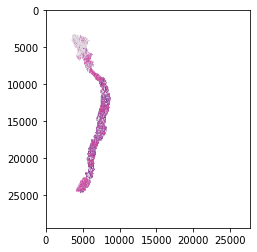

In [7]:
import matplotlib.pyplot as plt
plt.imshow(im0)
plt.show()

In [8]:
#Let's have a look at the first few to get an idea of what these images look like: 

def image(n): 
    """
    Given integer n, prints first n images in the train images file. 
    """
    for dirname, _, filenames in os.walk('/kaggle/input/prostate-cancer-grade-assessment/train_images'):
        for filename in filenames[0:n+1]:
            path = os.path.join(dirname, filename)
            im = skio.imread(path)
            plt.figure()
            plt.imshow(im)
    plt.show()

In [9]:
#image(2)

In [10]:
train.columns

Index(['image_id', 'data_provider', 'isup_grade', 'gleason_score'], dtype='object')

In [11]:
#Let's look at how many unique values we have in each column: 

for col in train.columns:
    print(f"{col}: {train[col].value_counts()} \n")

image_id: 0005f7aaab2800f6170c399693a96917    1
abfa36e4517733d5fe37f639328a736c    1
abfe06f56b989f9e1d6034b12bb885d8    1
ac07fd6531d7536124ceab1990d5227d    1
ac0d8bc88d9ec900be978a70b90e425b    1
                                   ..
5892b3113aa9e0decd5dc15c74c7b1a4    1
5895a94c14efb95f4a0369383f64f4ac    1
589c60dd4940000360acc551fd112705    1
589ce42577588f51fa6d8de876b55dbc    1
ffe9bcababc858e04840669e788065a1    1
Name: image_id, Length: 10616, dtype: int64 

data_provider: karolinska    5456
radboud       5160
Name: data_provider, dtype: int64 

isup_grade: 0    2892
1    2666
2    1343
4    1249
3    1242
5    1224
Name: isup_grade, dtype: int64 

gleason_score: 3+3         2666
0+0         1925
3+4         1342
4+3         1243
4+4         1126
negative     967
4+5          849
5+4          248
5+5          127
3+5           80
5+3           43
Name: gleason_score, dtype: int64 



In [12]:
#Let's look at these "negative" values for Gleason Score:

train[train["gleason_score"]=="negative"]["isup_grade"].value_counts()

0    967
Name: isup_grade, dtype: int64

In [13]:
#Seems like these should all be 0+0, so let's change them: 

train["gleason_score"] = train["gleason_score"].apply(lambda x: "0+0" if x=="negative" else x)

In [14]:
#Check that it worked: 

train[train["gleason_score"]=="negative"]["isup_grade"].value_counts()

Series([], Name: isup_grade, dtype: int64)

In [15]:
#Let's check to see if there are any errors in the ISUP grade assignment: 

for score in train["gleason_score"].unique():
    print(score,"\n", train[train["gleason_score"]==score]["isup_grade"].value_counts())
    

0+0 
 0    2892
Name: isup_grade, dtype: int64
4+4 
 4    1126
Name: isup_grade, dtype: int64
3+3 
 1    2666
Name: isup_grade, dtype: int64
4+3 
 3    1242
2       1
Name: isup_grade, dtype: int64
4+5 
 5    849
Name: isup_grade, dtype: int64
3+4 
 2    1342
Name: isup_grade, dtype: int64
5+4 
 5    248
Name: isup_grade, dtype: int64
5+5 
 5    127
Name: isup_grade, dtype: int64
5+3 
 4    43
Name: isup_grade, dtype: int64
3+5 
 4    80
Name: isup_grade, dtype: int64


In [16]:
#We can see that 4+3 has a single incorrect assignement corresponding to ISUP grade 2. Let's fix this: 

train[(train["gleason_score"]=="4+3") & (train["isup_grade"]==2)]  #index 7273

train.at[7273,"isup_grade"]=3

In [17]:
#Check

for score in train["gleason_score"].unique():
    print(score,"\n", train[train["gleason_score"]==score]["isup_grade"].value_counts())
    

0+0 
 0    2892
Name: isup_grade, dtype: int64
4+4 
 4    1126
Name: isup_grade, dtype: int64
3+3 
 1    2666
Name: isup_grade, dtype: int64
4+3 
 3    1243
Name: isup_grade, dtype: int64
4+5 
 5    849
Name: isup_grade, dtype: int64
3+4 
 2    1342
Name: isup_grade, dtype: int64
5+4 
 5    248
Name: isup_grade, dtype: int64
5+5 
 5    127
Name: isup_grade, dtype: int64
5+3 
 4    43
Name: isup_grade, dtype: int64
3+5 
 4    80
Name: isup_grade, dtype: int64


In [18]:
#Everything seems to be in order, so let's explore the data...

In [19]:
import seaborn as sns

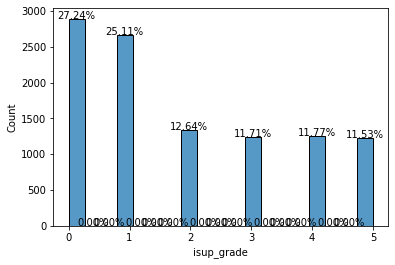

In [20]:
isup_plot = sns.histplot(train["isup_grade"])

#The following will show the percentages above each bar in the plot (code found in a Kaggle notebook):
for p in isup_plot.patches:
    height = p.get_height()
    isup_plot.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/10616),
                ha="center")

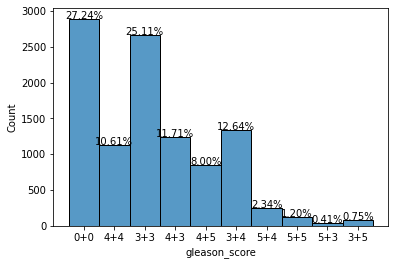

In [21]:
gleason_plot = sns.histplot(train["gleason_score"])

for p in gleason_plot.patches:
    height = p.get_height()
    gleason_plot.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/10616),
                ha="center")

In [22]:
"""
Not enough memory, but we would've used the following to create a column of image data to add to the training data, so 
that we could subsequently use this data to train a model. 

image = []
for id in train["image_id"]:
    img_path = "/kaggle/input/prostate-cancer-grade-assessment/train_images/" + id + ".tiff"
    img = skio.imread(img_path).flatten()
    image.append(img)"""

'\nNot enough memory, but we would\'ve used the following to create a column of image data to add to the training data, so \nthat we could subsequently use this data to train a model. \n\nimage = []\nfor id in train["image_id"]:\n    img_path = "/kaggle/input/prostate-cancer-grade-assessment/train_images/" + id + ".tiff"\n    img = skio.imread(img_path).flatten()\n    image.append(img)'

In [23]:
"""
Not enough memory to continue, but further steps would be: 

- First try to train a NN model just using these images (i.e. without the masks) and see how well it does. The model itself
would have flatten and convolution layers as well as multiple dense layers. Before this, we would also do some data augmentation
to reduce overfitting in the training stage. 
- Test different parameter values using cross-validation (or some other more appropriate method). 
- Look at the mask data, clean, augment, etc., then include this in the training of a new model and compare with model without
masks. 

"""

'\nNot enough memory to continue, but further steps would be: \n\n- First try to train a NN model just using these images (i.e. without the masks) and see how well it does. The model itself\nwould have flatten and convolution layers as well as multiple dense layers. Before this, we would also do some data augmentation\nto reduce overfitting in the training stage. \n- Test different parameter values using cross-validation (or some other more appropriate method). \n- Look at the mask data, clean, augment, etc., then include this in the training of a new model and compare with model without\nmasks. \n\n'